## Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils.segmentation import detect_sources
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground

## Import a file and display it

In [2]:
path='Savary_training_set_lenses/'
category='Lens_simulations/'
list_files=os.listdir(path+category)

In [3]:
file='8945.fits'

Text(0.5, 1.0, '8945.fits')

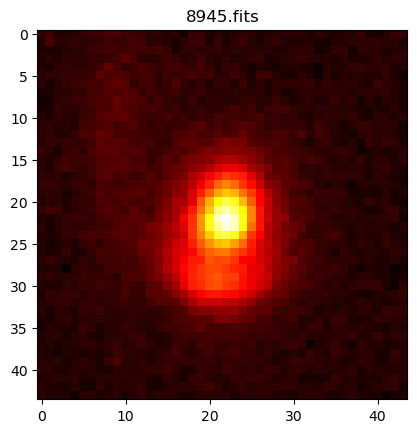

In [4]:
image_file=path+category+file
get_data, get_header = fits.getdata(image_file, header=True)
plt.imshow(get_data, cmap='hot')
plt.title(file)

## Let's define a function to get pixels values in a 5x5 px square at 4 corners of the picture

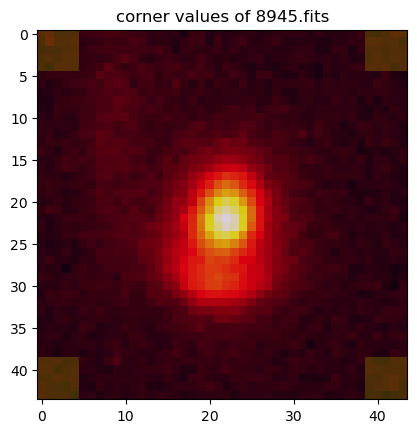

[ 3.11347318  7.07351923 -0.22379309 -0.46157753  1.36382699 -0.08525291
 10.72157192  2.16515708  1.74923921  4.69504404 -1.70933199 -1.06441951
 -1.28553843  0.81886971  2.93766284 -0.07715112  2.36754704 -0.20027938
  3.04916263  3.40672755  0.29020506 -3.05524755  2.99397635  4.21157551
  1.85521507 -2.25101519 -2.85897017  0.22832514  5.51720715  5.17682123
  3.54115796  3.53677797  0.90753537  1.62183177 -1.93821812  1.02750862
  0.85102439 -0.6494053   1.19502592  0.75543112 -0.54332167  3.50986719
 -0.14384861  2.38052177  2.70811749  2.46219015  2.51721454  4.22273874
 -2.16366863  0.99272925  1.48490768  1.40751935  1.93021733 -1.63831294
  0.15998894  1.86672664  1.52471053 -1.68768862  0.04893019  1.74989644
 -1.05431128 -0.25763127  3.65377964  1.27165027  2.23338455  2.75731087
 -0.47081569 -0.80414754 -1.93319055  1.74404297  2.75326943 -0.01686108
  0.52697617 -0.31707299 -4.81463403  2.13792883 -1.95500003 -1.39302546
  1.69760234  0.82822431  2.23819596  1.35997932  0

In [6]:
def corner_value(image,len=5):
    dimensions=np.shape(image)
    
    data=image[:len,:len] #up left corner
    data=np.append(data,image[:len,dimensions[0]-len:]) #up right corner
    data=np.append(data,image[dimensions[0]-len:,:len]) #down left corner
    data=np.append(data,image[dimensions[0]-len:,dimensions[1]-len:]) #down right corner
    
    return data

def corner_mask(image,len=5):
    dimensions=np.shape(image)
    mask=np.zeros(dimensions)
    
    mask[:len,:len]=1
    mask[:len,dimensions[0]-len:]=1
    mask[dimensions[0]-len:,:len]=1
    mask[dimensions[0]-len:,dimensions[1]-len:]=1
    
    return mask


plt.imshow(get_data,cmap='hot')
plt.imshow(corner_mask(get_data),alpha=0.2)
plt.title(f'corner values of {file}')
plt.show()
print(corner_value(get_data))

## Determination of the mean background and the std of the background in the dataset

In [7]:
mean_bg=[]
std_bg=[]
for file in list_files:
    image_file=path+category+file
    get_data, get_header = fits.getdata(image_file, header=True)
    corners=corner_value(get_data)
    mean_bg.append(np.mean(corners))
    std_bg.append(np.std(corners))

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.18281699e-03, 8.41210972e-02,
        4.04803733e-01, 8.41210972e-01, 9.05812257e-01, 6.79940139e-01,
        4.66616473e-01, 2.90938159e-01, 1.84973462e-01, 1.49187139e-01,
        1.22231208e-01, 1.31061599e-01, 9.71343056e-02, 6.78545867e-02,
        4.60109869e-02, 2.97444764e-02, 2.46321445e-02, 2.27731147e-02,
        1.90550552e-02, 1.25484510e-02, 1.58017531e-02, 1.44074807e-02,
        7.90087653e-03, 6.97136165e-03, 1.06894212e-02, 8.83039142e-03,
        7.43611909e-03, 5.11233187e-03, 4.18281699e-03, 3.71805954e-03,
        6.97136165e-03, 5.11233187e-03, 4.18281699e-03, 4.64757443e-03,
        9.29514886e-04, 3.71805954e-03, 1.39427233e-03, 4.64757443e-03,
        3.25330210e-03, 2.32378722e-03, 0.00000000e+00, 2.32378722e-03,
        2.78854466e-03, 1.39427233e-03, 1.39427233e-03, 2.323787

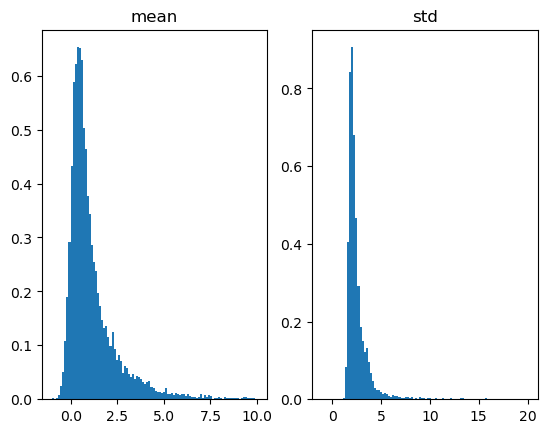

In [8]:
plt.subplot(121)
plt.title('mean')
plt.hist(mean_bg,bins=100,density=True, range=(-1,10))
plt.subplot(122)
plt.title('std')
plt.hist(std_bg,bins=100,density=True, range=(-1,20))

In [9]:
mean=np.mean(mean_bg)
std=np.mean(std_bg)
print(std)

2.6908589948745476


## Global mean substraction

Text(0.5, 1.0, '8945.fits')

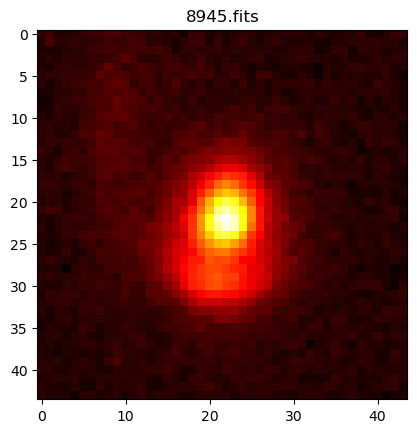

In [10]:
file='8945.fits'
image_file=path+category+file
get_data, get_header = fits.getdata(image_file, header=True)
get_data-=mean
plt.imshow(get_data, cmap='hot')
plt.title(file)

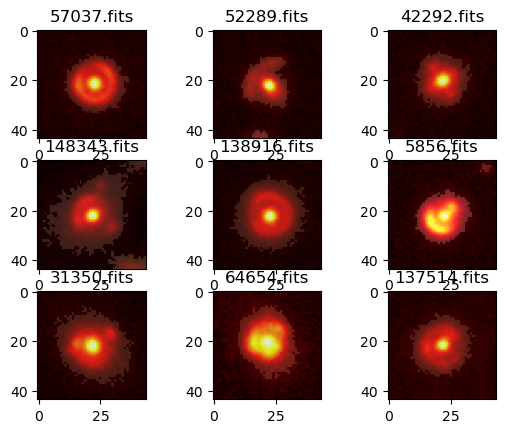

In [11]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    get_data-=mean
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.2)
plt.show()
    

## Specific mean substraction

Text(0.5, 1.0, '8945.fits')

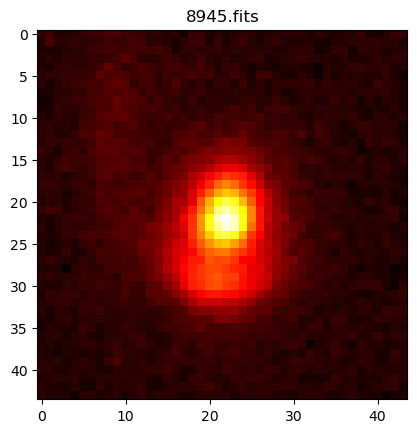

In [12]:
file='8945.fits'
image_file=path+category+file
get_data, get_header = fits.getdata(image_file, header=True)
mean=np.mean(corner_value(get_data))
get_data-=mean
plt.imshow(get_data, cmap='hot')
plt.title(file)

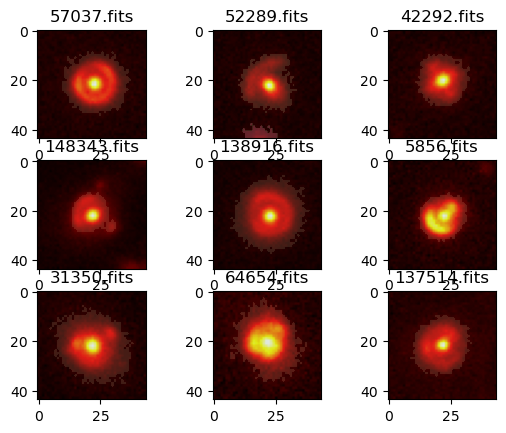

In [13]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    mean=np.mean(corner_value(get_data))
    std=np.std(corner_value(get_data))
    get_data-=mean
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.2)
plt.show()